# Pipeline for Developing a Machine Learning Model to Predict Chronic Kidney Disease

The goal of this Notebook is to describe and implement, step by step, the complete process of developing a Machine Learning model capable of predicting Chronic Kidney Disease (CKD) in patients.

To achieve this objective, the following workflow will be followed:

* Step 1: Dataset Exploration

* Step 2: Data Cleaning & Preprocessing

* Step 3: Models Selection

* Step 4: Models Training, Metrics Evaluation and Selection of the Final Model

* Step 5: Model Hyperparameters Optimization

* Step 6: Final Model Results, Performance Analysis and Conclusion

In the following sections, each step will be explained in detail.


The following libraries and files are required for the Notebook to work properly.

Libraries:
- Scikit-learn
- Pandas
- Matplotlib
- Numpy
- Seaborn
- Math
- IPython

Files:
- dataset_ckd.csv
- testset_CKD.csv



## Step 1: Dataset Exploration

The data used in this notebook is derived from a health related dataset deposited on the UCI Machine Learning Repository. It records multiple measurements related to kidney malfunction and was recorded in a medical setting over a 2 month period.

The dataset that will be used to train the model is called "dataset_ckd.csv". Once trained, the model will use the data stored in the dataset "testset_CKD.csv" to perform its predictions.


Description of the features stored in the dataset:

**ID**  
An unique identifier relative to the patient

**age**  
The age of the patient, in year.

**blood_pressure**  
The blood pressure of the patient, in mm/Hg.

**specific_gravity**  
The relative density of the patient's urine relative to water.

**albumin**  
Measure of quantity of albumin in urine (from 0 (absence) to 5).

**sugar**  
Measure of quantity of sugar in urine (from 0 (absence) to 5).

**red_blood_cells**  
Detection of abnormal presence of blood cells in the patient's urine (normal or abnormal).

**pus_cell**  
Detection of abnormal presence of pus cells in the patient's urine (normal or abnormal).

**pus_cell_clamp**  
Detection of presence of pus cells clamp in the patient's urine (present or not present).

**bacteria**  
Detection of presence ofbacteria in the patient's urine (present or not present).

**blood_glucose**  
Measure of the glucose in the patient's blood (mgs/dl).

**blood_urea**  
Measure of the concentration of urea in the patient's blood (mgs/dl).

**serum_creatinine**  
Measure of the concentration of creatinin in the patient's serum (mgs/dl).

**sodium**  
Measure of the contration of sodium ion in the patient's blood (mEq/L).

**potassium**  
Measure of the contration of potassium ion in the patient's blood (mEq/L).

**hemoglobin**  
The proportion of proteins in red blood cells.

**packed_cell_volume**  
Percentage of cell volume per blood volume.

**white_cell_count**  
Number of white cells per blood volume unit.

**red_cell_count**  
Number of red cells per blood volume unit.

**hypertension**  
Whether a patient has a preexisting hypertension condition (yes or no).

**diabete_mellitus**  
Whether a patient has a preexisting diabete mellitus condition (yes or no).

**coronary_artery_disease**  
Whether a patient has a preexisting coronary artery disease (yes or no).

**appetite**  
Whether the patient has good or poor appetite.

**pedal_edema**  
Whether the patient present a pedal edema (yes or no).

**anemia**  
Whether the patient is subject to anemia (yes or no).





### Import of Libraries and Load of Training Dataset



In [57]:
#General use Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from IPython.display import display, HTML

#Data Cleaning & Preprocessing Tools
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

#Model Selection Tools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Model Evaluation Tools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


#Load of the Dataset
path_data = 'dataset_ckd.csv'
df = pd.read_csv(path_data)

### Exploratory Analysis of the Dataset

In [58]:
#Since it is a small dataset we can display it fully to take look on the data structure and values
display(HTML(df.to_html()))

#Summary of the dataset
df.info()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clamp,bacteria,blood_glucose,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_cell_count,red_cell_count,hypertension,diabete_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,chronic_kidney_disease
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,1
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,1
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,1
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,1
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,1
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       344 non-null    int64  
 1   age                      335 non-null    float64
 2   blood_pressure           332 non-null    float64
 3   specific_gravity         297 non-null    float64
 4   albumin                  298 non-null    float64
 5   sugar                    295 non-null    float64
 6   red_blood_cells          192 non-null    object 
 7   pus_cell                 279 non-null    object 
 8   pus_cell_clamp           340 non-null    object 
 9   bacteria                 340 non-null    object 
 10  blood_glucose            300 non-null    float64
 11  blood_urea               325 non-null    float64
 12  serum_creatinine         327 non-null    float64
 13  sodium                   257 non-null    float64
 14  potassium                2

In [59]:
total_rows = len(df)  # automatically counts all rows in the dataset
missing_values = total_rows - df.count() # Calculation of missing values per attribute

print("List of missing values (NaN) per attribute : ")
print(missing_values)

List of missing values (NaN) per attribute : 
id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clamp               4
bacteria                     4
blood_glucose               44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_cell_count           105
red_cell_count             130
hypertension                 2
diabete_mellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
chronic_kidney_disease       0
dtype: int64


The dataset is composed of 344 entries, each representing the  data of an individual patient. There are a total of 26 attributes, organized in separated columns.

After a general inspection of the whole dataset and a summary of the attributes by using the function info(), several inconsistencies within the dataset were observed.

Notably, sevetal attributes contain missing values (NaN). The exact number of missing values per attribute was computed above. Some attributes exhibit a higher proportion of missing data than others, with red_blood_cells presenting the highest number of null values (152), followed by red_cell_count (131) and white_cell_count (106).

Additionally we notice that features that are suppose to be numerical, present a wrong datatype ("object" instead of "int64", "float64", respectively). This occurrs for "packed_cell_volume", "white_cell_count", and "red_cell_count".


Since the goal of the ML model is to predict if a patient will have CKD, another key aspect is to analyze if the dataset is well balanced. Specifically, when it comes to the outcome we want to predict.

To study this, a visualization of the attribute chronic_kidney_disease was performed.

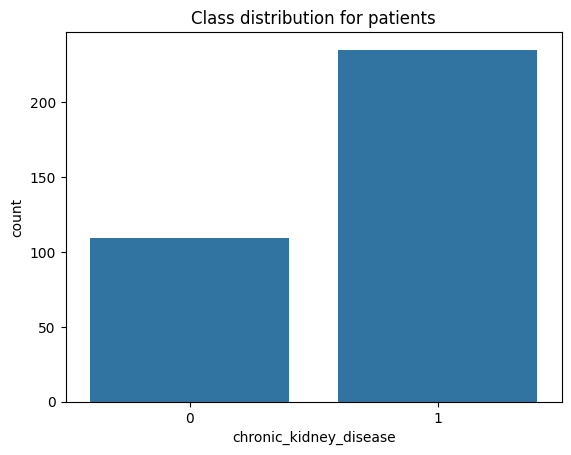

Class counts for chronic_kidney_disease:
chronic_kidney_disease
1    235
0    109
Name: count, dtype: int64


In [60]:
#Bar plot to visualize the distribution of patients who do not have CKD (0) vs patients who have CKD (1) in the whole dataset
sns.countplot(x='chronic_kidney_disease', data=df)
plt.title('Class distribution for patients')
plt.show()

# Print the counts
print("Class counts for chronic_kidney_disease:")
print(df['chronic_kidney_disease'].value_counts())


As previously introduced, the dataset contains 344 instances of patients.

Although there are no missing values for our critical attribute, chronic_kidney_disease, the dataset is noticeably imbalanced. Out of the 344 instances, 235 correspond to patients that have CKD, while 109 represents the patients that do not have the disease.

These proportions indicate that approximately 70% of patients in the dataset have the disease and 30% do not, so we can conclude that the dataset is not well balanced.  Such an imbalance is likely to bias the model towards the majority class, which may result in a high rate of false positives.
This will be further analyzed later when evaluating the model.

To explore the other attributes in detail, they were devided in two categories:

Numerical attributes:

- Age
- Blood pressure
- Blood glucose
- Blood urea
- Serum creatinine
- Sodium
- Potasium
- Hemoglobin
- Packed cell volume
- White cell count
- Red cell count

For each one of these numerical attributes, histograms were created to visualize their distribution (graphs on the left) along with bar plots to visualize the number of Non-null values vs NaN values (graphs on the right).  

Categorical attributes:

- Albumin
- Sugar
- Red blood cells
- Pus_cell
- Pus_cell_clamp
- Bacteria
- specific_gravity
- hypertension
- diabete_mellitus
- coronary_artery_disease
- appetite
- pedal_edema
- anemia
- chronic_kidney_disease

For each one of these categorical attributes, bar plots were made to visualize the distribution of classes.

In both cases, missing values were highlighted in red to emphasize their presence and impact for each attribute, across the dataset.

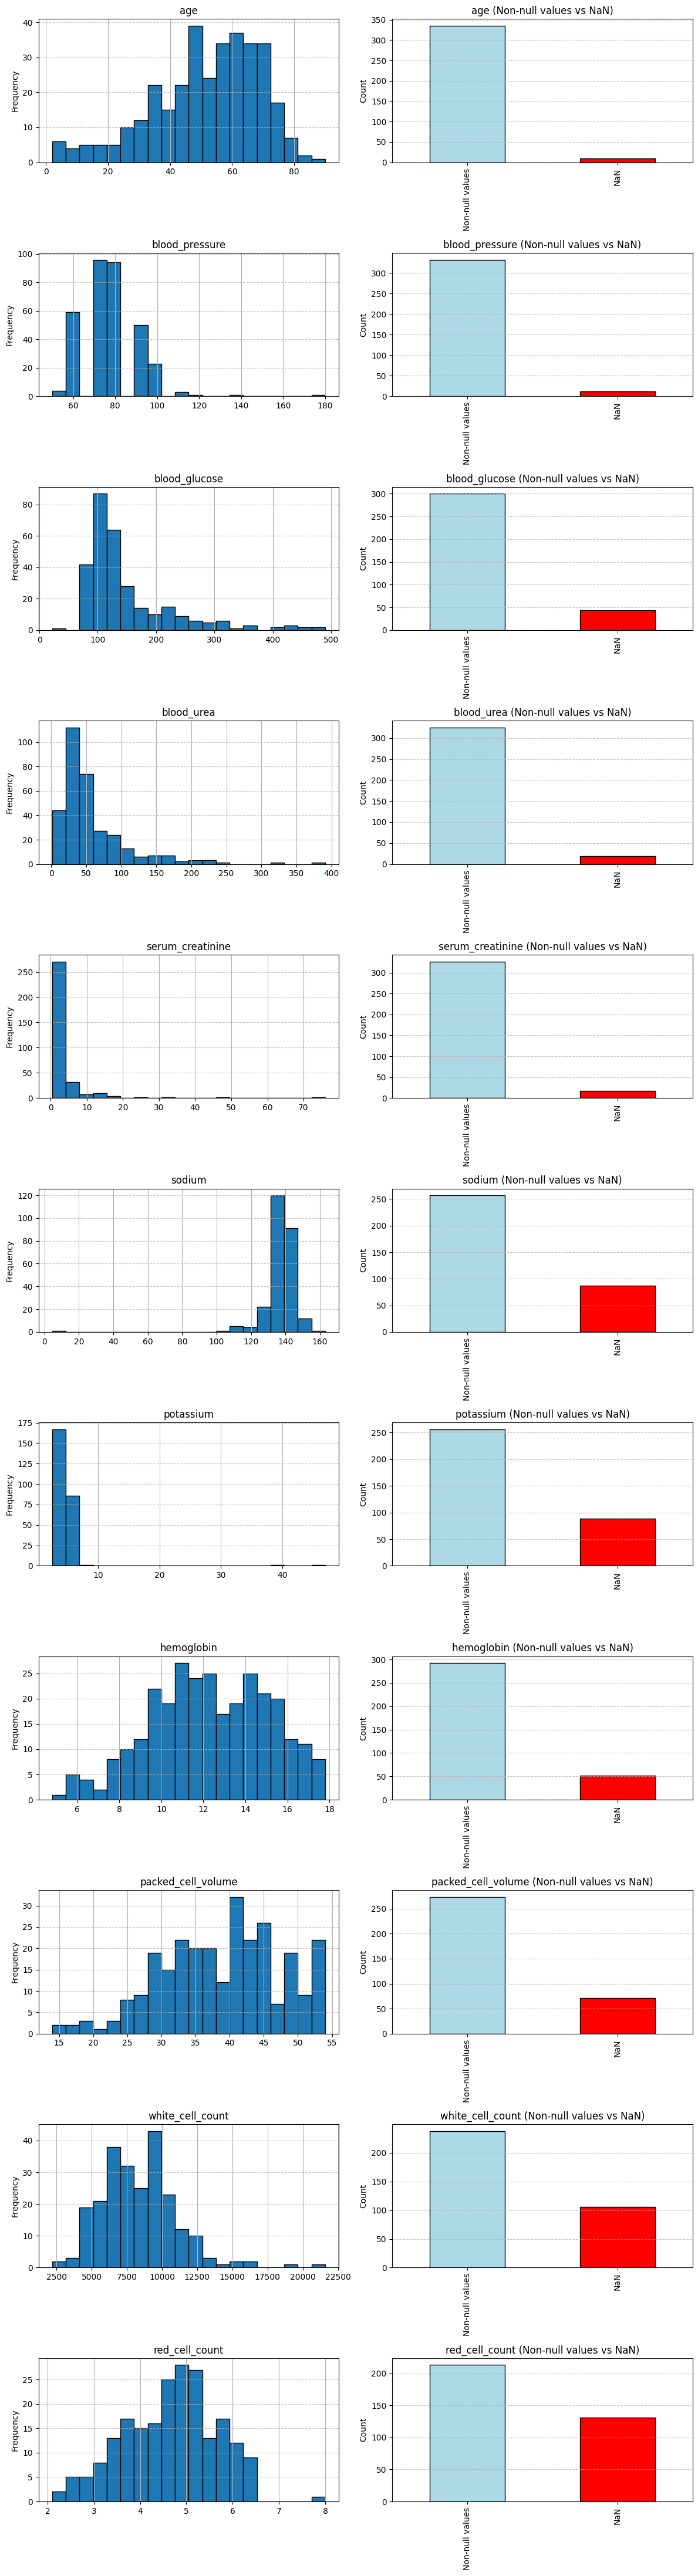

In [61]:
#Analysis of numerical attributes

# Columns to treat as encoded categorical
encoded_categorical = ["chronic_kidney_disease", "albumin", "sugar", "specific_gravity"] #These attributes are encoded as numbers but they represent categorical data, this is why we exclude them from the numerical data analysis

# Numeric columns stored as objects
object_numeric_cols = ["packed_cell_volume", "white_cell_count", "red_cell_count"]
for col in object_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Select numeric columns excluding ID and encoded categories
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = [col for col in numeric_cols if col not in ["id"] + encoded_categorical] #We exclude id attribute since it is not relevant to visualize it

# Add object_numeric_cols if not already in numeric_cols
for col in object_numeric_cols:
    if col not in numeric_cols:
        numeric_cols.append(col)

# Defining distribution of graphs in figure
n_rows = len(numeric_cols)
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))

if n_rows == 1:
    axes = [axes]  # ensure axes is iterable if only 1 row

for i, col in enumerate(numeric_cols):
    ax_hist = axes[i][0] if n_rows > 1 else axes[0]
    ax_nan = axes[i][1] if n_rows > 1 else axes[1]

    # Left graph: histogram
    df[col].hist(bins=20, edgecolor="black", ax=ax_hist)
    ax_hist.set_title(col)
    ax_hist.set_xlabel("")
    ax_hist.set_ylabel("Frequency")
    ax_hist.grid(axis="y", linestyle="--", alpha=0.7)

    # Right graph: Non-null values vs NaN counts
    counts = pd.Series({
        "Non-null values": df[col].notna().sum(),
        "NaN": df[col].isna().sum()
    })
    counts.plot(kind="bar", color=["lightblue", "red"], edgecolor="black", ax=ax_nan)
    ax_nan.set_title(f"{col} (Non-null values vs NaN)")
    ax_nan.set_ylabel("Count")
    ax_nan.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


Regarding the distribution of these attributes, we notice that some of them have a relatevely normal distribution (age, blood_pressure, sodium, hemoglobin, packed_cell_volume, red_cell_count, potassium, white_cell_count) while others present skewed distributions with different magnitudes of skewenss (blood_glucose, blood_urea, serum_creatinine).

Three attributes display a distinctly marked distribution: Serum_creatinine, sodium and potassium. Serum creatinine normal values tend to be between  0.74 to 1.35 mg/dL for men and 0.59 to 1.04 mg/dL for women, which explains the large bin we observe. Likewise, normal sodium values are between 135-145 mEQ/L , making the distribution reasonable. Potassium normal range for adults is between 3.5 to 5.2 mEq/L, which also is consistent with the distribution that we have in the dataset.

Also we can observe a reduced number of outliers for blood_pressure, blood_glucose, blood_urea, serum_creatinine, sodium, potassium, white_cell_count and red_cell_count.

Additionally, when looking at the number of missing values, we notice that the attributes red_cell_count, white_cell_count, sodium and potassium, each have nearly a third of their entries missing (approximately 100 NaN values per attribute).



/tmp/ipython-input-3337514400.py:33: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


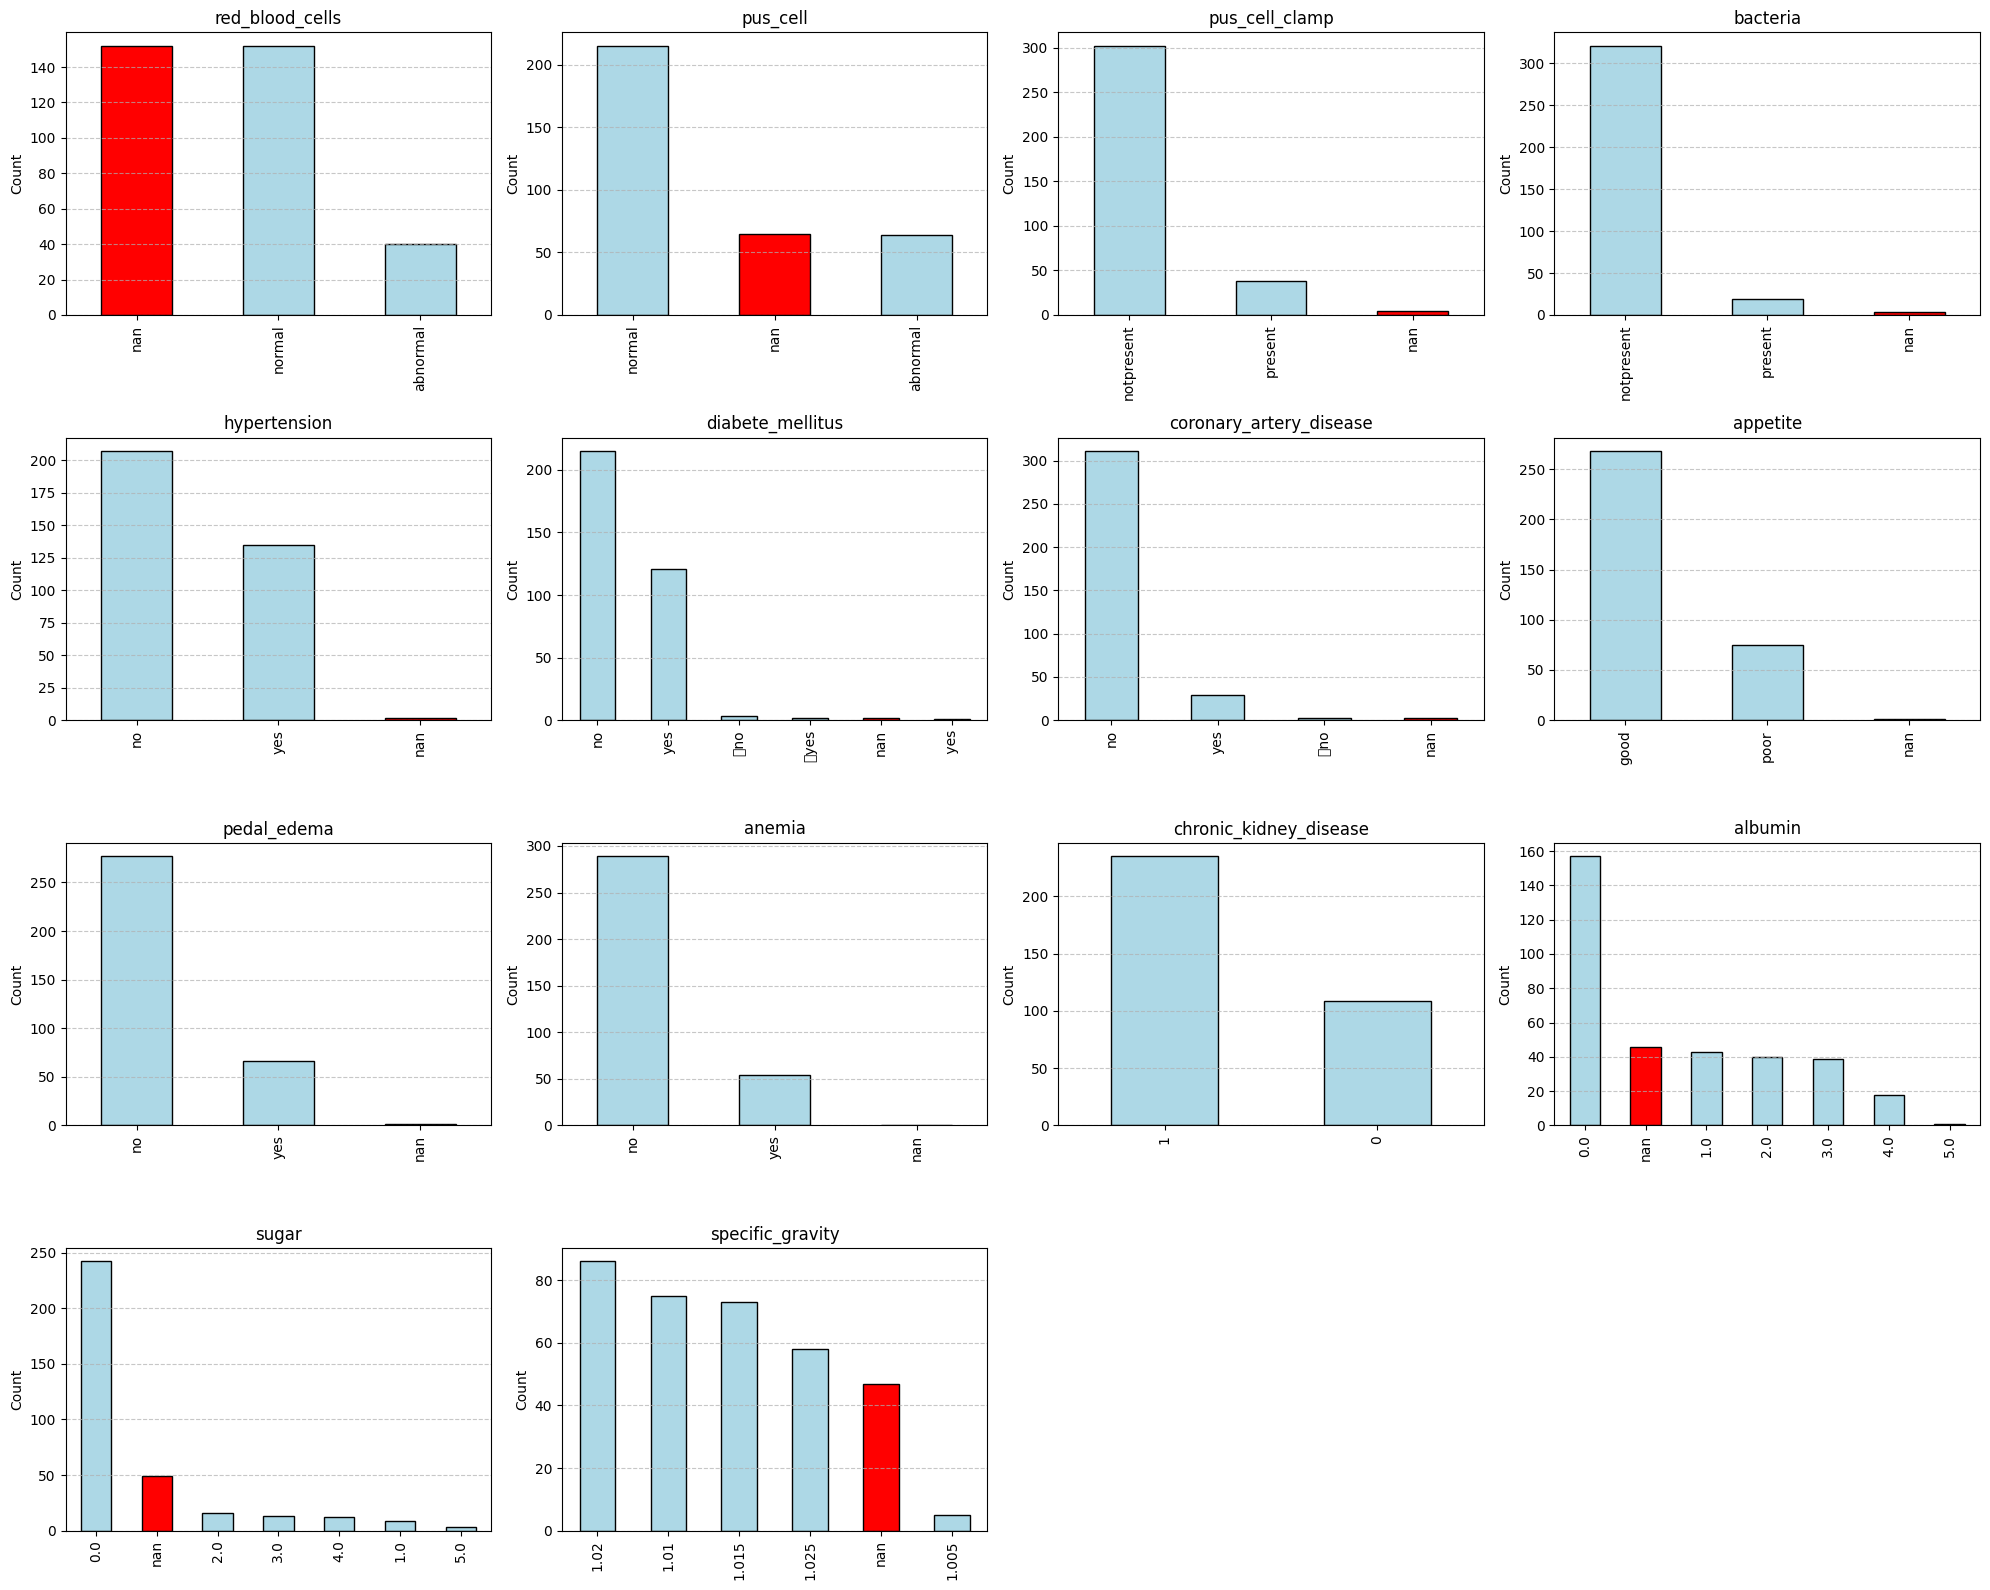

In [62]:
#Analysis of categorical attributes

# Categorical columns and encoded numeric categories
encoded_categorical = ["chronic_kidney_disease", "albumin", "sugar", "specific_gravity"]
categorical_cols = list(df.select_dtypes(include=["object"]).columns)
categorical_cols = [col for col in categorical_cols if col not in ["packed_cell_volume", "white_cell_count", "red_cell_count"]]
categorical_cols += encoded_categorical

# Defining distribution of graphs in figure
n = len(categorical_cols)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)

    # Count values including NaN
    counts = df[col].value_counts(dropna=False)

    # Colors: red for NaN, light blue for others
    colors = ["red" if pd.isna(x) else "lightblue" for x in counts.index]

    # Plot bar chart
    counts.plot(kind="bar", edgecolor="black", color=colors)

    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # horizontal grid lines

plt.tight_layout()
plt.show()


We can observe that some categorical attributes present additional categories that correspond to typing errors. This occurrs for diabete_mellitus and coronary_artery_disease.

Regarding the missing values counts, we notice that for some attributes the proportion is not significant, while for others it has a similar or even a larger proportion compared to the other associated categories. For example, this is noticeable in the attributes red_blood_cells, pus_cells, albumin, sugar and specific_gravity.



In order to find out which attributes might be significantly related in the dataset, a correlation analysis was also performed in this stage.

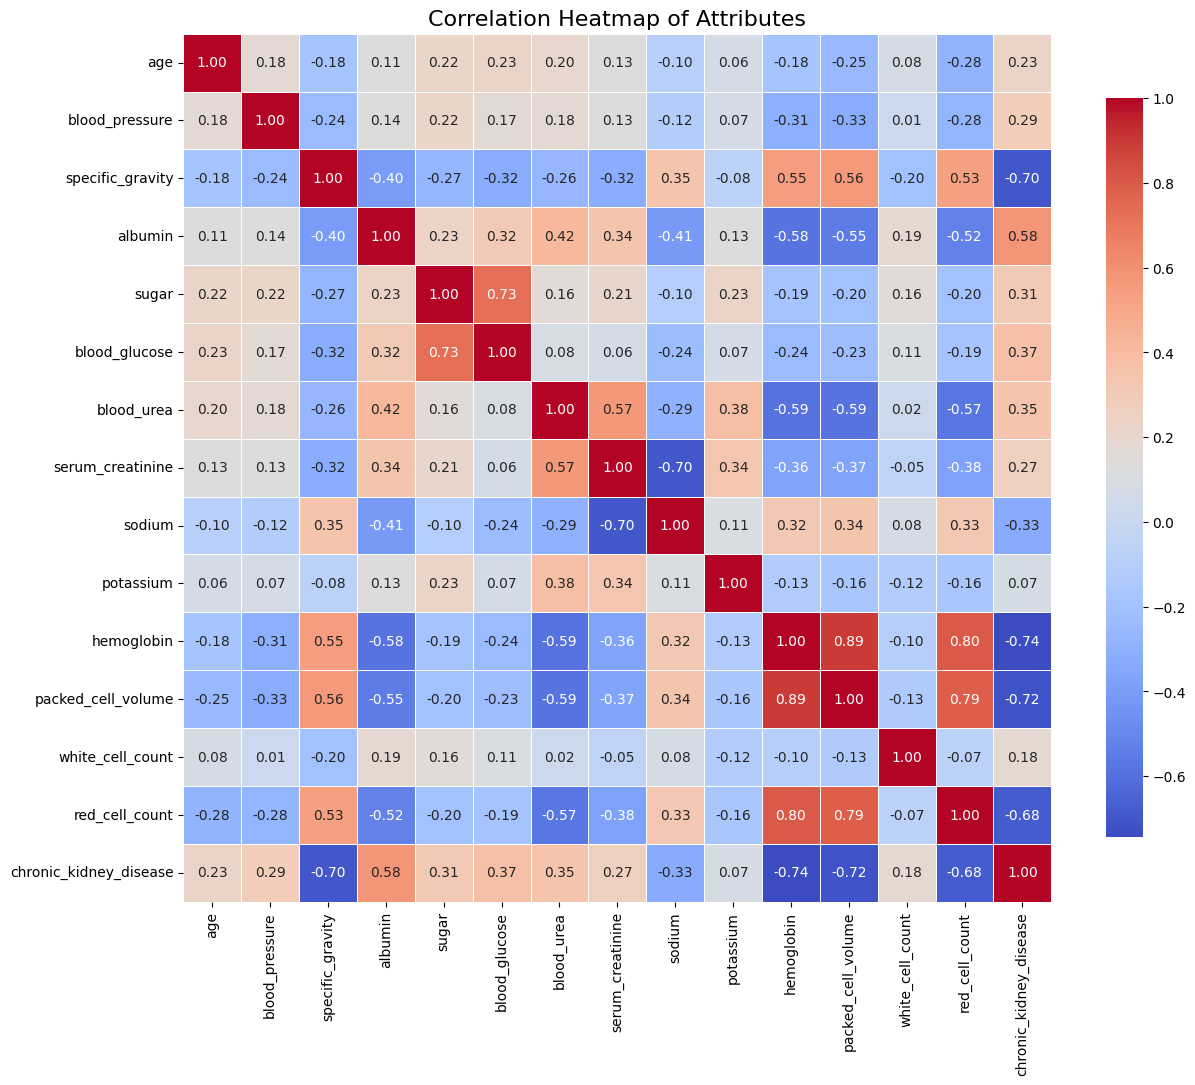

Dataframe containing all correlation values respective to our target variable (chronic_kidney_disease), sorted by absolute correlation values:


,Variable,Correlation,Strength,Sign
10,hemoglobin,-0.744097,Strong,Negative
11,packed_cell_volume,-0.716157,Strong,Negative
2,specific_gravity,-0.698741,Moderate,Negative
13,red_cell_count,-0.680788,Moderate,Negative
3,albumin,0.584138,Moderate,Positive
5,blood_glucose,0.372893,Weak,Positive
6,blood_urea,0.348205,Weak,Positive
8,sodium,-0.334797,Weak,Negative
4,sugar,0.312024,Weak,Positive
1,blood_pressure,0.290406,Weak,Positive


In [63]:
# Select numeric + ordinal + binary variables (exclude ID)
cols_for_corr = df.select_dtypes(include=["float64", "int64"]).columns
cols_for_corr = [col for col in cols_for_corr if col != "id"]

# Compute correlation matrix using Pearosn correlation
corr_matrix = df[cols_for_corr].corr() #Function uses Pearson as default

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Attributes", fontsize=16)
plt.show()

# Target variable
target = "chronic_kidney_disease"

# Reuse cols_for_corr from above
target_corr = corr_matrix[target].drop(target)

corr_df = target_corr.reset_index() # Dataframe containing all correlation respective to our target variable (chronic_kidney_disease)
corr_df.columns = ["Variable", "Correlation"]

def strength(val): #We define approximately ranges of values to determine the strength of correlation
    abs_v = abs(val)
    if abs_v >= 0.7:
        return "Strong"
    elif abs_v >= 0.4:
        return "Moderate"
    elif abs_v >= 0.2:
        return "Weak"
    else:
        return "Very weak"

corr_df["Strength"] = corr_df["Correlation"].apply(strength)
corr_df["Sign"] = corr_df["Correlation"].apply(lambda x: "Positive" if x > 0 else "Negative")

# Sort by absolute correlation
print("Dataframe containing all correlation values respective to our target variable (chronic_kidney_disease), sorted by absolute correlation values:")
corr_df = corr_df.reindex(corr_df["Correlation"].abs().sort_values(ascending=False).index)

corr_df

The correlation heatmap was performed on numeric, ordinal and binary attributes, since we are using Pearson correlation. Correlation has been performed regarding the outcome we want to predict (chronic_kidney_disease), which was defined as our target variable.

We can conclude that two variables (hemoglobin and packed_cell_volume) present the strongest correlations, being both negative. In a similar manner, specific_gravity, red_cell_count are moderately-negative correlated whereas albumin is moderately-positive correlated regarding the target variable. The other attributes exhibit weaker (positive or negative) correlations.

From a medical point of view, the results observed are coherent with the symptoms associated to the disease: for example anemia, is explained due to a lower hemoglobin concentration, lower number of red cells and in the end a lower percentage of cell volume per blood volume, in CKD patiens. Also, high levels of albumin in urine is an indicator of kidney damage, which also is coherent with the positive correlation observed in the heatmap. Regarding specific gravity in urine, it also makes sense that if kidney function is altered, the urine density tends to decrease, so it is less concentrated.  




Once we finished exploring the data, we can proceed with the second step: Data Cleaning & Preprocessing

## Step 2: Data Cleaning & Preprocessing


For the Data Cleaning & Preprocessing step it is important to design and implement a strategy allowing to adjust and correct the data inconsistencies that were identified in previous section.

In this step it is also important to address the missing values present in the dataset and perform the separation between training and test datasets, so that the model can be trained properly.

The final goal is to prepare the data so that it can serve as an imput to train the model.

To perform this, the following steps will be carried out:

1) Standarize inconsistencies in string values  in 'diabete_mellitus' and 'coronary_artery_disease':

To address typos found in the data

2) Adjusting datatype of features 'packed_cell_volume', 'white_cell_count', and 'red_cell_count' to numeric:

To convert object (string) values into numerical values (float)

3) We drop red_blood_cells feature:

This is performed due to the large amount of missing values. Also, since we keep red_cell_count feature, this attribute is reiterative and will only bring noise to the analysis.

Note: We also drop the id column since it is not relevant for the model, and the outcome column chronic_kidney_disease, as a good practice for the training.

4) Separation between training and test set

We do train-test dataset split before furthe processing to prevent dataleakage in the next steps involving statistical calculations.

5) Dealing with missing values: Imputation

We perform imputation to compute missing values based on the median (for numerical features) and on the mode (for categorical features). Both appoaches are robust enough for the small dataset size we are dealing with.

6) Encoding of categorical values

Categorical binary values are encoded using 0s and 1s

7) Scaling of only numerical features

We perform scaling to normalize the dataset numerical continuos features by considering a mean = 0 and standard deviation = 1, so that all features contribute equally to the model and no single variable disproportionately affects the learning process (to avoid disproportions due to magnitudes).

8) Addressing unbalanced of classes in dataset by SMOTE

SMOTE (Oversampling minority class using synthetic samples) method was preferred over others such as random downsampling the majority class, in order to prevent information loss because we are dealing with a small dataset.





In [64]:
#Standarization of the dataset, features engineering and data cleaning

copy_df = df.copy() # We create a copy of the dataframe containing the dataset to avoid modifying the original data


# 1) Standardize inconsistent string values in 'diabete_mellitus' and 'coronary_artery_disease'

# BEFORE standardization
print("Value counts for 'diabete_mellitus' BEFORE standardization:")
print(copy_df['diabete_mellitus'].value_counts(dropna=False))

print("\nValue counts for 'coronary_artery_disease' BEFORE standardization:")
print(copy_df['coronary_artery_disease'].value_counts(dropna=False))


# Mapping dictionnaries
dm_mapping = {
    '\tno': 'no',
    '\tyes': 'yes',
    'yes ': 'yes'
}

cad_mapping = {
    '\tno': 'no'
}

#Application of mappiing to replace values
copy_df['diabete_mellitus'] = ( #For diabete_mellitus
    copy_df['diabete_mellitus']
        .where(copy_df['diabete_mellitus'].isna(),
              copy_df['diabete_mellitus'].astype(str).str.strip())
        .replace(dm_mapping)
)

copy_df['coronary_artery_disease'] = ( #For coronary_artery_disease
    copy_df['coronary_artery_disease']
        .where(copy_df['coronary_artery_disease'].isna(),
              copy_df['coronary_artery_disease'].astype(str).str.strip())
        .replace(cad_mapping)
)


# AFTER standardization
print("\nValue counts for 'diabete_mellitus' AFTER standardization:")
print(copy_df['diabete_mellitus'].value_counts(dropna=False))

print("\nValue counts for 'coronary_artery_disease' AFTER standardization:")
print(copy_df['coronary_artery_disease'].value_counts(dropna=False))



# 2) Adjusting datatype of features 'packed_cell_volume', 'white_cell_count', and 'red_cell_count' to numeric
for col in ['packed_cell_volume', 'white_cell_count', 'red_cell_count']:
    copy_df[col] = pd.to_numeric(copy_df[col], errors='coerce').astype('float64') #Converted to float64 everything, since it does not impact the result

print("\nData types after converting features to numeric:")
print(copy_df[['packed_cell_volume', 'white_cell_count', 'red_cell_count']].dtypes)


# 3) We drop red_blood_cells feature from the dataset and replace it in the features. This is performed due to the significant number of missing values, as seen in the exploratory analysis section.
copy_df = copy_df.drop(columns=['red_blood_cells'])

Value counts for 'diabete_mellitus' BEFORE standardization:
diabete_mellitus
no       215
yes      121
\tno       3
\tyes      2
NaN        2
 yes       1
Name: count, dtype: int64

Value counts for 'coronary_artery_disease' BEFORE standardization:
coronary_artery_disease
no      311
yes      29
\tno      2
NaN       2
Name: count, dtype: int64

Value counts for 'diabete_mellitus' AFTER standardization:
diabete_mellitus
no     218
yes    124
NaN      2
Name: count, dtype: int64

Value counts for 'coronary_artery_disease' AFTER standardization:
coronary_artery_disease
no     313
yes     29
NaN      2
Name: count, dtype: int64

Data types after converting features to numeric:
packed_cell_volume    float64
white_cell_count      float64
red_cell_count        float64
dtype: object


In [65]:
#We create the dataframe "features_df" containing all features except for "id", which is not relevant and "chronic_kidney_disease" (the outcome we want to predict)
features_df = copy_df.drop(columns=['id', 'chronic_kidney_disease']) # Removal of "id" and "chronic_kidney_disease" columns
print("DataFrame after dropping 'id' and 'chronic_kidney_disease' columns:")
display(features_df)

#We create the dataframe "outcomes_df" containing the column "chronic_kidney_disease" (outcome we want to predict)
outcomes_df = copy_df['chronic_kidney_disease']
print("Dataframe containing the target variable  that we want to predict (chronic_kidney_disease):")
display(outcomes_df)


#4) We do train-test dataset split before further statistical processing to prevent dataleakage in the normalizing steps that will be performed next

features_train, features_test, outcomes_train, outcomes_test = train_test_split(
    features_df, outcomes_df, test_size=0.2, random_state=20, stratify=outcomes_df) # We use stratify because in the dataset we have the data ordered as all 1 values and then 0 values for the chronic_kidney_disease feature



#display(features_train)
#display(features_test)
#display(outcomes_train)
#display(outcomes_test)

DataFrame after dropping 'id' and 'chronic_kidney_disease' columns:


,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clamp,bacteria,blood_glucose,blood_urea,...,hemoglobin,packed_cell_volume,white_cell_count,red_cell_count,hypertension,diabete_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,43.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,117.0,45.0,...,13.0,54.0,7400.0,5.4,no,no,no,good,no,no
340,50.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,137.0,46.0,...,14.1,45.0,9500.0,4.6,no,no,no,good,no,no
341,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
342,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no


Dataframe containing the target variable  that we want to predict (chronic_kidney_disease):


,chronic_kidney_disease
0,1
1,1
2,1
3,1
4,1
...,...
339,0
340,0
341,0
342,0


In [66]:
#5) Dealing with missing values: Imputation

#We identify numerical and categorical columns (columns are the same in training and test set, so we use train as reference)
numerical_cols = features_train.select_dtypes(include=['int64','float64']).columns
categorical_cols = features_train.select_dtypes(include=['object']).columns

# We perform imputation of missing values separately on the training and test sets to avoid data leakage, which could occur if we imputed using the entire dataset combined.

#For numerical features: we use median because distributions are skewed and median is robust to outliers
num_imputer = SimpleImputer(strategy='median')

features_train[numerical_cols] = num_imputer.fit_transform(features_train[numerical_cols]) #Note: We use .fit only in training dataset to not affect the "real" data (dataleakage)
features_test[numerical_cols]  = num_imputer.transform(features_test[numerical_cols])

#For categorical features: we use mode to impute missing values with the most frequent category
cat_imputer = SimpleImputer(strategy='most_frequent')

features_train[categorical_cols] = cat_imputer.fit_transform(features_train[categorical_cols]) #Note: We use .fit only in training dataset to not affect the "real" data (dataleakage)
features_test[categorical_cols]  = cat_imputer.transform(features_test[categorical_cols])


In [67]:
# 6) Ordinal and one-hot encoding of features

# We encode "no" and "yes" values to "0" and "1" respectively in the features that contain these type of values

yes_no_mapping = {'no': 0, 'yes': 1}

ordinal_features = [
    'hypertension',
    'diabete_mellitus',
    'coronary_artery_disease',
    'pedal_edema',
    'anemia'
]

#We proceed with the encoding in both features train and test set
for col in ordinal_features:
    if col in features_train.columns:
        features_train[col] = features_train[col].map(yes_no_mapping)
        features_test[col]  = features_test[col].map(yes_no_mapping)



#Values we want to encode in "0" and "1" format, following same format as above
binary_mapping = {
    'normal': 0,
    'abnormal': 1,
    'notpresent': 0,
    'present': 1,
    'poor': 1,
    'good': 0
}

#Columns related to the values identified in" binary_mapping" dictionary
binary_encoding_cols = [
    'pus_cell',
    'pus_cell_clamp',
    'bacteria',
    'appetite'
]

#We proceed with the encoding in both features train and test set
for col in binary_encoding_cols:
    if col in features_train.columns:
        features_train[col] = features_train[col].map(binary_mapping)
        features_test[col]  = features_test[col].map(binary_mapping)



In [68]:
# 7) Scaling of only numerical features

#We define the binary features that we DO NOT want to scale
binary_cols = [
    'pus_cell', 'pus_cell_clamp', 'bacteria', 'hypertension',
    'diabete_mellitus', 'coronary_artery_disease', 'pedal_edema',
    'anemia', 'appetite'
]

#We select the numerical features to scale
numeric_cols_final = features_train.select_dtypes(include=['float64','int64']).columns
numeric_features_to_scale = [col for col in numeric_cols_final if col not in binary_cols]


#Scaling is perfomed to adjust numerical data in a specific range, normalizing everything to have mean = 0 and standard deviation = 1 so it is comparable.
scaler = StandardScaler()

features_train[numeric_features_to_scale] = scaler.fit_transform(features_train[numeric_features_to_scale]) #Once again, .fit only applied to train set.
features_test[numeric_features_to_scale]  = scaler.transform(features_test[numeric_features_to_scale])



In [69]:
# 8) Addressing unbalanced of classes in dataset

# We add an additional step of SMOTE (Oversampling minority class using synthetic samples) to address the unbalance of the dataset in the CKD outcome we want to predict.
# Since dataset is small, this method was preferred rather than random downsampling the majority class to avoid information loss

smote = SMOTE(random_state=20)
features_train, outcomes_train = smote.fit_resample(features_train, outcomes_train)

print("Class distribution after SMOTE:")
print(outcomes_train.value_counts())


Class distribution after SMOTE:
chronic_kidney_disease
1    188
0    188
Name: count, dtype: int64


In [70]:
# Processed subsets display
print("Processed training dataset below:")
display(HTML(features_train.to_html()))
features_train.info()

print("Processed test dataset below:")
display(HTML(features_test.to_html()))
features_test.info()



Processed training dataset below:


,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clamp,bacteria,blood_glucose,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_cell_count,red_cell_count,hypertension,diabete_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,0.656395,0.246813,-1.249166,0.909423,1.539911,0,0,0,-0.335709,-0.287246,0.062754,-0.156155,-0.135358,0.268076,0.199800,0.698880,-0.670276,1,0,1,0,0,0
1,-2.648371,-1.863244,-1.249166,-0.688604,-0.376268,0,0,0,-0.335709,-0.660412,-0.388211,0.041510,-0.075848,-0.215736,-0.331069,1.908220,0.082075,0,0,0,0,0,0
2,-0.369222,-0.456540,-1.249166,0.909423,-0.376268,0,0,0,-0.428254,0.832252,-0.114411,0.041510,-0.075848,-1.788127,-1.658239,-1.208156,0.082075,0,0,1,0,0,1
3,0.713374,-0.456540,-0.292284,-0.688604,-0.376268,0,0,0,-0.428254,0.854203,0.690885,-0.057323,-0.105603,-1.788127,-2.321825,-0.091842,0.082075,1,1,1,0,1,1
4,0.485459,0.950165,-0.292284,-0.688604,-0.376268,0,0,0,-0.335709,2.741984,11.755646,-13.152584,-0.075848,-0.578596,-0.861937,-0.975591,-1.422627,1,1,1,0,0,0
5,0.884310,0.246813,1.621480,-0.688604,-0.376268,0,0,0,-0.613343,-0.331148,-0.404317,0.041510,-0.075848,2.203326,0.730668,-1.115130,0.583642,0,0,0,0,0,0
6,-0.768073,-0.456540,-0.292284,-0.688604,-0.376268,0,0,0,-0.547240,0.481037,-0.178834,0.239174,-0.224622,0.006011,0.067082,-0.091842,0.082075,1,0,0,1,1,0
7,0.542437,0.950165,-0.292284,-0.688604,1.539911,0,0,0,-0.335709,-0.287246,-0.259364,0.041510,-0.075848,0.006011,0.067082,0.698880,0.082075,0,1,0,1,0,1
8,-0.198286,0.246813,-0.292284,-0.688604,1.539911,0,0,0,0.907035,-0.682363,-0.275470,0.239174,-0.194868,0.348712,0.067082,-0.091842,0.082075,0,1,0,1,0,0
9,-0.084329,-0.104863,0.664598,-0.688604,-0.376268,0,0,0,-0.705888,-0.792118,-0.291576,1.227495,0.043172,1.034113,1.261536,-1.673287,0.834426,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      376 non-null    float64
 1   blood_pressure           376 non-null    float64
 2   specific_gravity         376 non-null    float64
 3   albumin                  376 non-null    float64
 4   sugar                    376 non-null    float64
 5   pus_cell                 376 non-null    int64  
 6   pus_cell_clamp           376 non-null    int64  
 7   bacteria                 376 non-null    int64  
 8   blood_glucose            376 non-null    float64
 9   blood_urea               376 non-null    float64
 10  serum_creatinine         376 non-null    float64
 11  sodium                   376 non-null    float64
 12  potassium                376 non-null    float64
 13  hemoglobin               376 non-null    float64
 14  packed_cell_volume       3

,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clamp,bacteria,blood_glucose,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_cell_count,red_cell_count,hypertension,diabete_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
269,-1.223903,0.246813,0.664598,-0.688604,-0.376268,0,0,0,-0.745550,-0.287246,-0.404317,0.140342,0.102681,1.759831,1.792404,0.884932,0.332858,0,0,0,0,0,0
49,0.599416,0.246813,-0.292284,-0.688604,4.414179,0,0,0,1.330096,-0.682363,-0.323787,0.041510,-0.075848,0.509982,0.199800,0.094210,-0.043317,1,1,0,0,0,0
185,1.055246,0.950165,0.664598,0.909423,0.581821,1,0,1,0.510414,0.955177,0.046649,0.041510,-0.224622,-2.634799,0.067082,-0.091842,0.082075,1,1,1,1,0,0
325,0.941289,-1.159892,1.621480,-0.688604,-0.376268,0,0,0,-0.269606,-0.309197,-0.307681,0.140342,-0.254377,2.042055,1.526970,-0.743025,1.712168,0,0,0,0,0,0
251,-1.508797,0.246813,1.621480,-0.688604,-0.376268,0,0,0,-0.322488,-0.792118,-0.291576,0.436838,0.072927,1.074430,1.261536,-0.649999,0.709034,0,0,0,0,0,0
261,-1.793690,-0.456540,0.664598,-0.688604,-0.376268,0,0,0,-0.296047,-0.243344,-0.323787,-0.254987,-0.254377,0.913159,0.730668,-1.301182,0.082075,0,0,0,0,0,0
153,0.599416,-0.104863,-0.292284,1.708436,-0.376268,0,0,0,-0.335709,-0.287246,-0.259364,0.041510,-0.075848,0.792206,0.465234,0.884932,0.082075,1,1,0,0,0,0
152,1.682012,-1.159892,-0.292284,-0.688604,-0.376268,0,0,0,0.034470,-0.353099,-0.146622,0.930999,-0.135358,-0.578596,-0.463786,0.512828,-2.927329,1,1,1,1,1,0
194,0.542437,-0.456540,-0.292284,-0.688604,-0.376268,0,0,0,-0.600123,-0.594559,-0.146622,0.041510,-0.075848,0.106805,0.597951,-0.091842,0.082075,1,1,0,0,0,0
97,1.397118,-0.456540,-0.292284,0.909423,-0.376268,1,1,0,1.065683,3.554169,1.157956,0.041510,-0.075848,-0.860820,-0.331069,2.047759,-0.670276,1,0,0,1,1,1


<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 269 to 41
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      69 non-null     float64
 1   blood_pressure           69 non-null     float64
 2   specific_gravity         69 non-null     float64
 3   albumin                  69 non-null     float64
 4   sugar                    69 non-null     float64
 5   pus_cell                 69 non-null     int64  
 6   pus_cell_clamp           69 non-null     int64  
 7   bacteria                 69 non-null     int64  
 8   blood_glucose            69 non-null     float64
 9   blood_urea               69 non-null     float64
 10  serum_creatinine         69 non-null     float64
 11  sodium                   69 non-null     float64
 12  potassium                69 non-null     float64
 13  hemoglobin               69 non-null     float64
 14  packed_cell_volume       69 non

After having obtained the processed training dataset and test dataset, we can continue with the next step: models selection.

## Step 3: Models Selection

In this step, we will choose the different models that we will test and compare in the following section, along with the metrics that will be used to perform these comparisons.

The following models were selected:

* Logistic Regression

* Random Forest

* Decision Tree

These predicting models were chosen due to their different approaches when predicting data. For example, logistic regression is based on linear relationships between the features and the target outcome we want to predict. Decision tree is a more easily interpretable model also useful in classification. And finally, Random Forest tends to be more robust when learning about more complex relationships and non-linear patterns in the data.

Comparing these models based on different approaches will be useful to select the model that best fits with the data we have.




In [71]:
#We define the models that we will be evaluating
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=20),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=20),
    "Decision Tree": DecisionTreeClassifier(random_state=20)
    }


# We define the function that will be used to compute all the metrics required for model analysis
def compute_metrics(y_true, y_pred):
    """
    Computes a full set of classification metrics:
    accuracy, balanced accuracy, F1, recall (sensitivity),
    specificity, precision, and confusion matrix components.
    """

    # Confusion Matrix
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

    # Metrics
    accuracy     = accuracy_score(y_true, y_pred)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    precision    = precision_score(y_true, y_pred)
    recall       = recall_score(y_true, y_pred)                # Sensitivity
    specificity  = TN / (TN + FP) if (TN + FP) > 0 else 0      # True Negative Rate
    f1           = f1_score(y_true, y_pred)

    return {
        "Accuracy": accuracy,
        "Balanced-Accuracy": balanced_acc,
        "F1-Score": f1,
        "Sensitivity (Recall)": recall,
        "Specificity": specificity,
        "Precision": precision,
        "TP": TP,
        "TN": TN,
        "FP": FP,
        "FN": FN
    }

    #We define the function that will be used to plot the confusion matrix plots for model analysis

def plot_confusion_matrix(cm, title, ax=None):
    """
    This function is used to plot a confusion matrix, allowing to plot individual confusion matrices.
    Also, it is adapted to allow plotting multiple previously defined confusion matrices together.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 4))

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Predicted Healthy", "Predicted CKD"],
        yticklabels=["Actual Healthy", "Actual CKD"],
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    return ax



## Step 4: Models Training, Metrics Evaluation and Selection of the Final Model

Once the models were selected, now we want to train the models and compute different metrics that will allow us to compare and ultimately conclude which model will be the best one for our goal.

The following metrics were considered for this analysis:

- Number of predicted values that are:

-TP (True Positives): Model predicts that the patient has CKD, and the patient actually does have the disease.

-TN (True Negatives): Model predicts that the patient does not have CKD, and the patient actually does not have the disease.

-FP (False Positives): Model predicts that the patient has CKD, but the patient actually does not  have the disease.

-FN (False Negatives): Model predicts that the patient does not have CKD, but the patient actually does have the disease.

Based on this values then the following metrics were computed:

- Sensivity (or recall) : TP / (TP + FN)

- Specificity : TN / (TN + FP)

- Precision : TP / (TP + FP)

- Accuracy : (TP + TN) / (TP + TN + FN + FP)

- Balanced Accuracy = (Recall + Specificity) / 2

- F1- Score : 2* (Precision * Recall) / (Precision + Recall)

### Logistic Regression

Logistic Regression metrics:
Accuracy: 0.9855072463768116
Balanced-Accuracy: 0.9893617021276595
F1-Score: 0.989247311827957
Sensitivity (Recall): 0.9787234042553191
Specificity: 1.0
Precision: 1.0
TP: 46
TN: 22
FP: 0
FN: 1


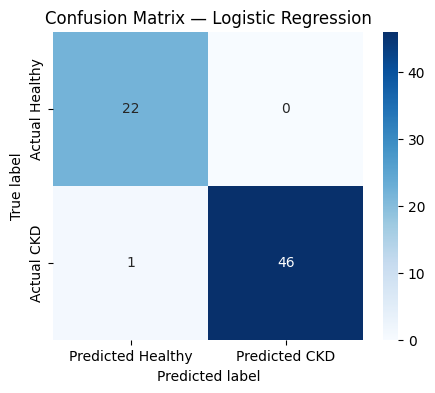

In [72]:
# We retrieve logistic regression model from previously defined  dictionary with all models
logreg = models["Logistic Regression"]

# Model training
logreg.fit(features_train, outcomes_train)

#Model prediction
y_pred_logreg = logreg.predict(features_test)

#Model metrics calculation
metrics_logreg = compute_metrics(outcomes_test, y_pred_logreg)

#Confusion matrix calculation and visualization
cm_logreg = confusion_matrix(outcomes_test, y_pred_logreg)
cm_plot_logreg = plot_confusion_matrix(cm_logreg, "Confusion Matrix — Logistic Regression")

print("Logistic Regression metrics:")
for m, v in metrics_logreg.items():
    print(f"{m}: {v}")

### Decision Tree

Decision Tree metrics:
Accuracy: 0.9855072463768116
Balanced-Accuracy: 0.9893617021276595
F1-Score: 0.989247311827957
Sensitivity (Recall): 0.9787234042553191
Specificity: 1.0
Precision: 1.0
TP: 46
TN: 22
FP: 0
FN: 1


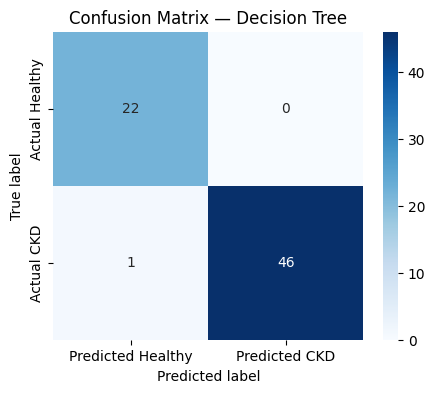

In [73]:
# We retrieve decision tree model from previously defined dictionary with all models
dt = models["Decision Tree"]

# Model training
dt.fit(features_train, outcomes_train)

# Model prediction
y_pred_dt = dt.predict(features_test)

# Model metrics calculation
metrics_dt = compute_metrics(outcomes_test, y_pred_dt)

#Confusion matrix calculation and visualization
cm_dt = confusion_matrix(outcomes_test, y_pred_dt)
cm_plot_dt = plot_confusion_matrix(cm_dt, "Confusion Matrix — Decision Tree")

print("Decision Tree metrics:")
for m, v in metrics_dt.items():
    print(f"{m}: {v}")


### Random Forest

Random Forest metrics:
Accuracy: 1.0
Balanced-Accuracy: 1.0
F1-Score: 1.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
TP: 47
TN: 22
FP: 0
FN: 0


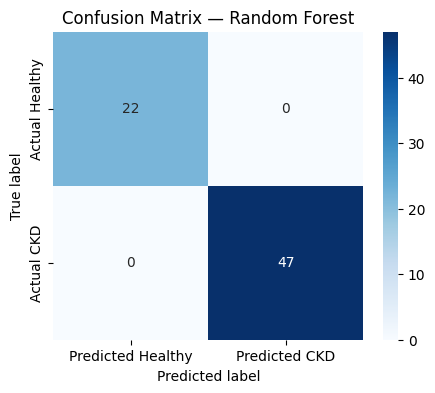

In [74]:
# We retrieve random forest model from previously defined dictionary with all models
rf = models["Random Forest"]

# Model training
rf.fit(features_train, outcomes_train)

# Model prediction
y_pred_rf = rf.predict(features_test)

# Model metrics calculation
metrics_rf = compute_metrics(outcomes_test, y_pred_rf)

#Confusion matrix calculation and visualization
cm_rf = confusion_matrix(outcomes_test, y_pred_rf)
cm_plot_rf = plot_confusion_matrix(cm_rf, "Confusion Matrix — Random Forest")

print("Random Forest metrics:")
for m, v in metrics_rf.items():
    print(f"{m}: {v}")


,Model,Accuracy,Balanced-Accuracy,F1-Score,Sensitivity (Recall),Specificity,Precision,TP,TN,FP,FN
0,Logistic Regression,0.985507,0.989362,0.989247,0.978723,1.0,1.0,46,22,0,1
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.0,1.0,47,22,0,0
2,Decision Tree,0.985507,0.989362,0.989247,0.978723,1.0,1.0,46,22,0,1


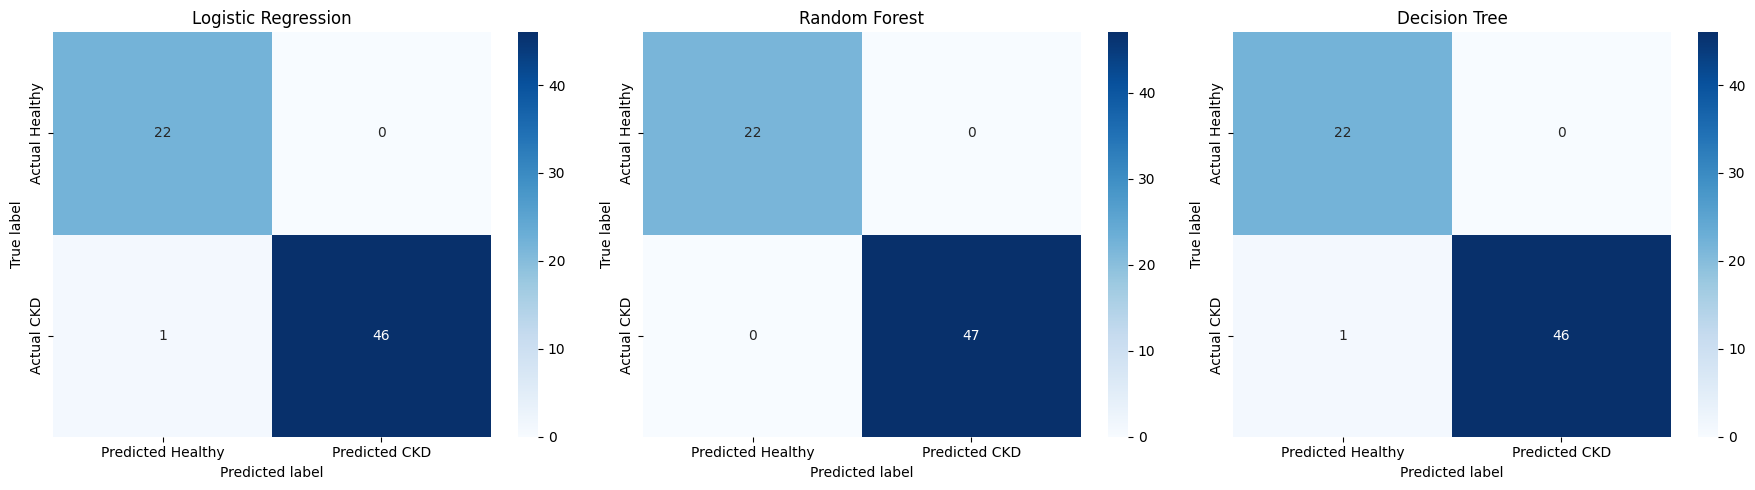

In [75]:
#Comparison of comptued metrics for all models in a comparative dataframe
models_evaluation_df = pd.DataFrame([
    {"Model": "Logistic Regression", **metrics_logreg},
    {"Model": "Random Forest", **metrics_rf},
    {"Model": "Decision Tree", **metrics_dt}
])

display(models_evaluation_df)


#Summary of all confusion matrices together
fig, axes = plt.subplots(1, 3, figsize=(18,5))
cm_plot_logreg = plot_confusion_matrix(cm_logreg, "Logistic Regression", ax=axes[0])
cm_plot_rf     = plot_confusion_matrix(cm_rf, "Random Forest", ax=axes[1])
cm_plot_dt     = plot_confusion_matrix(cm_dt, "Decision Tree", ax=axes[2])
plt.tight_layout()
plt.show()

After comparing the different metrics of the models, we can conclude that Random Forest is the best one because it does not exhibit any FP or FN in its prediction, which leads to the highest scores in the metrics mentioned before. The performance of Random Forest is followed by Logistic Regression, and Decision Tree, both presenting a similar performance.

Even tough in general, all performances globally seem okay, since we want to predictively diagnostic a disease, we want to minimize the FP and FN in our prediction. And this is why Random Forest is the best model in this case.

## Step 5: Model Hyperparameters Optimization

Formally in a ML workflow once we define a model, the next step is to optimize its hyperparameters in order to define which hyperparameters are the ones that maximize the performance of the model.

In our previous analysis already the model presented the best possible metrics, so in this particular case this step could seem redudnant. However, the step will still be performed in order to maintain and respect the good practices.



 * Best Parameters Found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

 * Best CV Balanced Accuracy Score:
0.9865576102418208
------NON-OPTIMIZED RANDOM FOREST MODEL------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        47

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



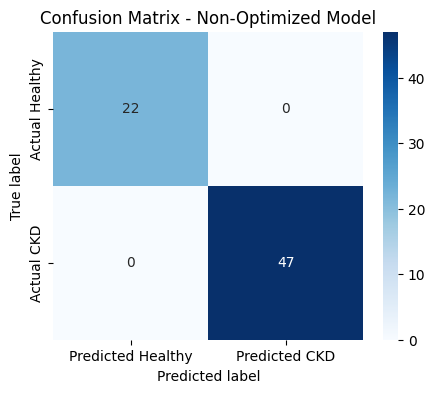

------OPTIMIZED RANDOM FOREST MODEL------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        47

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



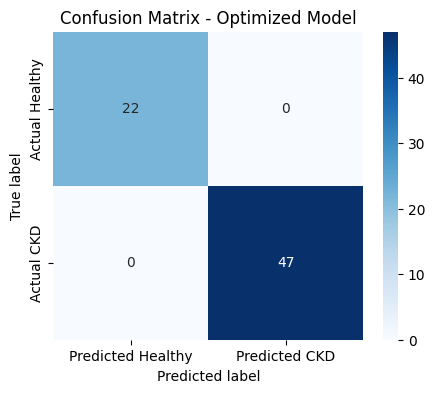

In [76]:
#Definition of parameters to test
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


# Optimization using Cross Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)
grid_search.fit(features_train, outcomes_train)
best_rf = grid_search.best_estimator_


# Optimization metrics
print("\n * Best Parameters Found:") # Best parameters obtained
print(grid_search.best_params_)

print("\n * Best CV Balanced Accuracy Score:") # Best cross validation balanced accuracy score obtained
print(grid_search.best_score_)


#Prediction comparation between non-optimzed model and optimized model

y_pred_original = rf.predict(features_test) # Predicting using non-optimzed model
y_pred_best = best_rf.predict(features_test) # Predicting using optimzed model

# Confusion matrices calculation between non-optimzed model and optimized model

cm_original = confusion_matrix(outcomes_test, y_pred_original) #Confusion matrix calculation using non-optimzed model
cm_best = confusion_matrix(outcomes_test, y_pred_best) #Confusion matrix calculation using optimzed model

# Output results of non-optimized model
print("------NON-OPTIMIZED RANDOM FOREST MODEL------")
print(classification_report(outcomes_test, y_pred_original))
plot_confusion_matrix(cm_original, "Confusion Matrix - Non-Optimized Model")
plt.show()

# Output results of optimized model
print("------OPTIMIZED RANDOM FOREST MODEL------")
print(classification_report(outcomes_test, y_pred_best))
plot_confusion_matrix(cm_best, "Confusion Matrix - Optimized Model")
plt.show()



As expected, we do not see any change from our previous model, so we could use one or the other interchangeably.

However, this is not usually the case. So one possible explanaition is that the combination of using a RandomForest model (which is robust and able to capture complex relationships within the data) on a small dataset, could result in a model that is already well-optimize so there is no room for further improvement.

Despite of this, for bigger and more complext datasets this step is essential to improve the model`s performance.




## Step 6: Final Model Results, Performance Analysis and Conclusion

In this final step we will load the test dataset on which we want to perform our final predictions.

In order to do this, we will apply roughly the same pipeline of transformations as we did previously in order to end up with a processed dataset ready to feed to the model for it to perform its predictions.

In [77]:
# We evaluate model performance when using test_CKD dataset

#Import of testset
path_test = 'testset_CKD.csv'
df_test = pd.read_csv(path_test)


#We visualize the testdataset
display(HTML(df_test.to_html()))

#Summary of the dataset
df_test.info()

# We analyze if we have missing values
summary = pd.DataFrame({
    "dtype": df_test.dtypes,
    "unique_vals": df_test.nunique(dropna=False),
    "missing_vals": df_test.isna().sum(),
})

print(summary)

# We analyze if there is not any typing error values as in training dataset, i.e: "\tno" instead of "no"
for col in df_test.columns:
    print(f"\n * Column: {col}")
    print(df_test[col].value_counts(dropna=False))


,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clamp,bacteria,blood_glucose,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_cell_count,red_cell_count,hypertension,diabete_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,0,60.0,60.0,1.010,3.0,1.0,normal,abnormal,present,notpresent,288.0,36.0,1.7,130.0,3.0,7.9,25,15200,3.0,yes,no,no,poor,no,yes
1,1,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,133.0,48.0,1.2,147.0,4.3,14.8,46,6600,5.5,no,no,no,good,no,no
2,2,46.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,100.0,47.0,0.5,142.0,3.5,16.4,43,5700,6.5,no,no,no,good,no,no
3,3,59.0,70.0,1.010,1.0,3.0,abnormal,abnormal,notpresent,notpresent,424.0,55.0,1.7,138.0,4.5,12.6,37,10200,4.1,yes,yes,yes,good,no,no
4,4,59.0,100.0,1.020,4.0,2.0,normal,normal,notpresent,notpresent,252.0,40.0,3.2,137.0,4.7,11.2,30,26400,3.9,yes,yes,no,poor,yes,no
5,5,61.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,120.0,29.0,0.7,137.0,3.5,17.4,52,7000,5.3,no,no,no,good,no,no
6,6,56.0,90.0,1.010,4.0,1.0,normal,abnormal,present,notpresent,176.0,309.0,13.3,124.0,6.5,3.1,9,5400,2.1,yes,yes,no,poor,yes,yes
7,7,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,255.0,132.0,12.8,135.0,5.7,7.3,20,9800,3.9,yes,yes,yes,good,no,yes
8,8,42.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,132.0,24.0,0.7,140.0,4.1,14.4,50,5000,4.5,no,no,no,good,no,no
9,9,37.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,109.0,47.0,1.1,141.0,4.9,15.0,48,7000,5.2,no,no,no,good,no,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       56 non-null     int64  
 1   age                      56 non-null     float64
 2   blood_pressure           56 non-null     float64
 3   specific_gravity         56 non-null     float64
 4   albumin                  56 non-null     float64
 5   sugar                    56 non-null     float64
 6   red_blood_cells          56 non-null     object 
 7   pus_cell                 56 non-null     object 
 8   pus_cell_clamp           56 non-null     object 
 9   bacteria                 56 non-null     object 
 10  blood_glucose            56 non-null     float64
 11  blood_urea               56 non-null     float64
 12  serum_creatinine         56 non-null     float64
 13  sodium                   56 non-null     float64
 14  potassium                56 

Since there are no missing values, and values do not contain typos we will perform the strictly required transformations accordingly based on what it was done before for the training set.

For example, the test dataset does not contain the outcome we want to predict so we do not have to drop this column.

Note: Altough the key transformation steps were mantain it important to add the transformations steps according to what it is required for the test dataset in use

In [78]:
#We perform the transformationd steps required to prepare the test dataset for the model to use it


# 2) Adjusting datatype of features 'packed_cell_volume', 'white_cell_count', and 'red_cell_count' to numeric
for col in ['packed_cell_volume', 'white_cell_count', 'red_cell_count']:
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce').astype('float64') #Converted to float64 everything, since it does not impact the result

print("\nData types after converting features to numeric:")
print(df_test[['packed_cell_volume', 'white_cell_count', 'red_cell_count']].dtypes)



#Drop red_blood_cells and id columns
copy_test_df = df_test.drop(columns=['id', 'red_blood_cells'])

#Imputation to maintain consistency with previous transformation
numerical_test_cols = copy_test_df.select_dtypes(include=['int64','float64']).columns
categorical_test_cols = copy_test_df.select_dtypes(include=['object']).columns

copy_test_df[numerical_test_cols]  = num_imputer.transform(copy_test_df[numerical_test_cols])
copy_test_df[categorical_test_cols]  = cat_imputer.transform(copy_test_df[categorical_test_cols])



#Encode values
for col in ordinal_features:
    if col in copy_test_df.columns:
        copy_test_df[col] = copy_test_df[col].map(yes_no_mapping)

for col in binary_encoding_cols:
    if col in copy_test_df.columns:
        copy_test_df[col] = copy_test_df[col].map(binary_mapping)


#Scalling of values
numeric_cols_final_test = copy_test_df.select_dtypes(include=['float64','int64']).columns
numeric_features_to_scale_test = [col for col in numeric_cols_final_test if col not in binary_cols]
copy_test_df[numeric_features_to_scale_test]  = scaler.transform(copy_test_df[numeric_features_to_scale])

#Display of the transformed test dataset
display(HTML(copy_test_df.to_html()))
copy_test_df.info()




Data types after converting features to numeric:
packed_cell_volume    float64
white_cell_count      float64
red_cell_count        float64
dtype: object


,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clamp,bacteria,blood_glucose,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_cell_count,red_cell_count,hypertension,diabete_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,0.485459,-1.159892,-1.249166,1.708436,0.581821,1,1,0,1.885365,-0.418952,-0.211046,-0.749148,-0.492417,-1.788127,-1.790956,3.210586,-2.174978,1,0,0,1,0,1
1,0.314523,0.246813,0.664598,-0.688604,-0.376268,0,0,0,-0.163840,-0.155540,-0.291576,0.930999,-0.105603,0.993795,0.996102,-0.789538,0.959817,0,0,0,0,0,0
2,-0.312243,-0.456540,1.621480,-0.688604,-0.376268,0,0,0,-0.600123,-0.177491,-0.404317,0.436838,-0.343642,1.638878,0.597951,-1.208156,2.213735,0,0,0,0,0,0
3,0.428480,-0.456540,-1.249166,0.110409,2.498000,1,0,0,3.683377,-0.001884,-0.211046,0.041510,-0.046093,0.106805,-0.198352,0.884932,-0.795668,1,1,1,0,0,0
4,0.428480,1.653518,0.664598,2.507450,1.539911,0,0,0,1.409420,-0.331148,0.030543,-0.057323,0.013417,-0.457643,-1.127371,8.420051,-1.046452,1,1,0,1,1,0
5,0.542437,-0.456540,1.621480,-0.688604,-0.376268,0,0,0,-0.335709,-0.572608,-0.372105,-0.057323,-0.343642,2.042055,1.792404,-0.603486,0.709034,0,0,0,0,0,0
6,0.257544,0.950165,-1.249166,2.507450,0.581821,1,1,0,0.404649,5.573656,1.657240,-1.342141,0.549005,-3.723377,-3.914429,-1.347695,-3.303504,1,1,0,1,1,1
7,0.428480,1.653518,-0.292284,2.507450,1.539911,0,0,0,1.449082,1.688339,1.576710,-0.254987,0.310966,-2.030033,-2.454542,0.698880,-1.046452,1,1,1,0,0,1
8,-0.540158,0.246813,0.664598,-0.688604,-0.376268,0,0,0,-0.177061,-0.682363,-0.372105,0.239174,-0.165113,0.832524,1.526970,-1.533748,-0.294101,0,0,0,0,0,0
9,-0.825052,-1.159892,0.664598,-0.688604,-0.376268,0,0,0,-0.481137,-0.177491,-0.307681,0.338006,0.072927,1.074430,1.261536,-0.603486,0.583642,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      56 non-null     float64
 1   blood_pressure           56 non-null     float64
 2   specific_gravity         56 non-null     float64
 3   albumin                  56 non-null     float64
 4   sugar                    56 non-null     float64
 5   pus_cell                 56 non-null     int64  
 6   pus_cell_clamp           56 non-null     int64  
 7   bacteria                 56 non-null     int64  
 8   blood_glucose            56 non-null     float64
 9   blood_urea               56 non-null     float64
 10  serum_creatinine         56 non-null     float64
 11  sodium                   56 non-null     float64
 12  potassium                56 non-null     float64
 13  hemoglobin               56 non-null     float64
 14  packed_cell_volume       56 

In [79]:
#We predict on the new test dataset using the previously trained model

# Perform prediction
CKD_predictions = best_rf.predict(copy_test_df) #Adjust here the model to use to predict

# Display the predictions
print("Predictions on new CKD dataset:")
print(CKD_predictions)

# Save predictions to CSV
pred_df = pd.DataFrame({
    "id": df_test["id"],
    "prediction": CKD_predictions
})

#Export of final results

Surname = 'Alvarez-Quintero'
Name = 'Guido'

pred_df.to_csv(f'{Surname}_{Name}_prediction.csv', index=False)
print(f'Predictions saved as {Surname}_{Name}_prediction.csv')


Predictions on new CKD dataset:
[1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
Predictions saved as Alvarez-Quintero_Guido_prediction.csv


#### Conclusion

The machine learning workflow, starting from raw data, through data cleaning and preprocessing, followed by creation and evaluation of a model, until culminating by generating predictions, has been completed.

The results suggest that the model might be robust to predict Chronic Kidney Disease, but further evaluation is advised. Improvement of the model using a larger dataset for training, while considering additional clinically significative features might enhance the performance of the model in real-life scenarios.

